In [2]:
import math
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

lwidth = 1
msize = 4
s = 16

In [3]:
def get_all_data_points(folder_name: str):
    data_dict = {}
    with os.scandir(folder_name) as entries:
        for entry in entries:
            arr = []
            if entry.is_file():
                with open(entry.path, 'r') as file:
                    for line in file:
                        d = line.strip().split()
                        arr.append([float(i.replace(',', '.')) for i in d])
                arr = np.array(arr)
                # print(arr)
                data_dict[os.path.splitext(os.path.basename(entry))[0]] = arr
    return data_dict

In [69]:
# data = get_all_data_points('NO-NO')

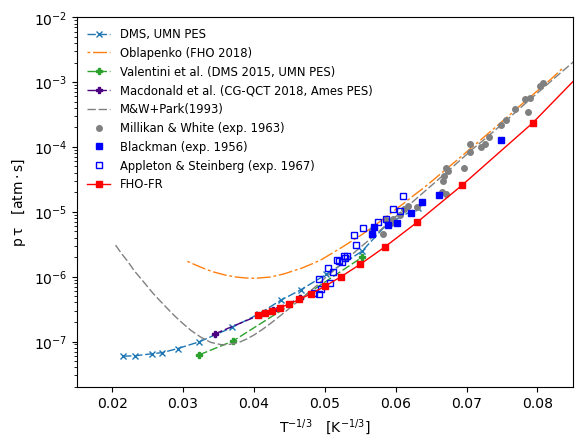

In [20]:
data = get_all_data_points('N2-N2')

fig, ax = plt.subplots()

dms, = ax.plot(data['DMS'][:, 0], data['DMS'][:, 1], 'x', markersize=msize, linewidth=lwidth)
dms.set_dashes([6, 2])
dms.set_label('DMS, UMN PES')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth)
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

valentini_dms, = ax.plot(data['Valentini'][:, 0], data['Valentini'][:, 1], '-P', markersize=msize, linewidth=lwidth)
valentini_dms.set_dashes([6, 2])
valentini_dms.set_label('Valentini et al. (DMS 2015, UMN PES)')

macdonald_cg_qct, = ax.plot(data['Macdonald'][:, 0], data['Macdonald'][:, 1], '-P', color='indigo', markersize=msize, linewidth=lwidth)
macdonald_cg_qct.set_dashes([6, 2])
macdonald_cg_qct.set_label('Macdonald et al. (CG-QCT 2018, Ames PES)')

mw_park, = ax.plot(data['MW_Park'][:, 0], data['MW_Park'][:, 1], color='gray', linewidth=lwidth)
mw_park.set_dashes([6, 2])
mw_park.set_label('M&W+Park(1993)')

mw, = ax.plot(data['MW'][:, 0], data['MW'][:, 1], 'o', color='gray', markersize=msize)
mw.set_label('Millikan & White (exp. 1963)')

blackman, = ax.plot(data['Blackman'][:, 0], data['Blackman'][:, 1], 's', color='blue', markersize=msize)
blackman.set_label('Blackman (exp. 1956)')

ap_st, = ax.plot(data['Ap_St'][:, 0], data['Ap_St'][:, 1], 's', fillstyle='none', color='blue', markersize=msize)
ap_st.set_label('Appleton & Steinberg (exp. 1967)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
ax.set_xlim(0.015, 0.085)
ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'N2-N2' + '.png', dpi=600)

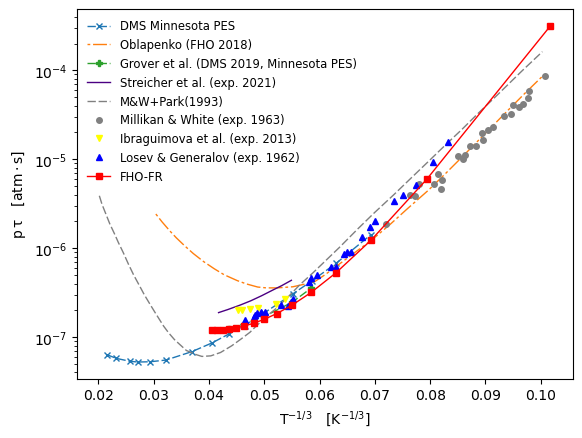

In [23]:
data = get_all_data_points('O2-O2')

fig, ax = plt.subplots()

dms, = ax.plot(data['DMS'][:, 0], data['DMS'][:, 1], 'x', markersize=msize, linewidth=lwidth)
dms.set_dashes([6, 2])
dms.set_label('DMS Minnesota PES')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth)
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

grover_dms, = ax.plot(data['Grover_dms'][:, 0], data['Grover_dms'][:, 1], '-P', markersize=msize, linewidth=lwidth)
grover_dms.set_dashes([6, 2])
grover_dms.set_label('Grover et al. (DMS 2019, Minnesota PES)')

streicher, = ax.plot(data['Streicher'][:, 0], data['Streicher'][:, 1], color='indigo', markersize=msize, linewidth=lwidth)
streicher.set_label('Streicher et al. (exp. 2021)')

mw_park, = ax.plot(data['MW_Park'][:, 0], data['MW_Park'][:, 1], color='gray', linewidth=lwidth)
mw_park.set_dashes([6, 2])
mw_park.set_label('M&W+Park(1993)')

mw, = ax.plot(data['MW'][:, 0], data['MW'][:, 1], 'o', color='gray', markersize=msize)
mw.set_label('Millikan & White (exp. 1963)')

ibraguimova, = ax.plot(data['Ibraguimova'][:, 0], data['Ibraguimova'][:, 1], 'v', color='yellow', markersize=msize)
ibraguimova.set_label('Ibraguimova et al. (exp. 2013)')

lg, = ax.plot(data['LG'][:, 0], data['LG'][:, 1], '^', color='blue', markersize=msize)
lg.set_label('Losev & Generalov (exp. 1962)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
# ax.set_xlim(0.015, 0.085)
# ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'O2-O2' + '.png', dpi=600)

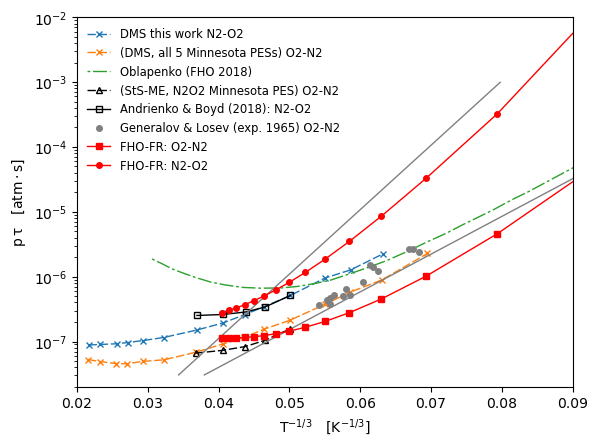

In [65]:
data = get_all_data_points('O2-N2')

fig, ax = plt.subplots()

dmsno, = ax.plot(data['DMSNO'][:, 0], data['DMSNO'][:, 1], 'x', markersize=msize, linewidth=lwidth)
dmsno.set_dashes([6, 2])
dmsno.set_label('DMS this work N2-O2')

dmson, = ax.plot(data['DMSON'][:, 0], data['DMSON'][:, 1], 'x', markersize=msize, linewidth=lwidth)
dmson.set_dashes([6, 2])
dmson.set_label('(DMS, all 5 Minnesota PESs) O2-N2')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth)
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

sts_me, = ax.plot(data['sts_me'][:, 0], data['sts_me'][:, 1], '-^', fillstyle='none',markersize=msize, color='black', linewidth=lwidth)
sts_me.set_dashes([6, 2])
sts_me.set_label('(StS-ME, N2O2 Minnesota PES) O2-N2')

andrienko, = ax.plot(data['Andrienko'][:, 0], data['Andrienko'][:, 1], '-s', fillstyle='none', color='black', markersize=msize, linewidth=lwidth)
andrienko.set_label('Andrienko & Boyd (2018): N2-O2')

mwno, = ax.plot(data['MWNO'][:, 0], data['MWNO'][:, 1], color='gray', linewidth=lwidth)

mwon, = ax.plot(data['MWON'][:, 0], data['MWON'][:, 1], color='gray', linewidth=lwidth)

gl, = ax.plot(data['GL'][:, 0], data['GL'][:, 1], 'o', color='gray', markersize=msize)
gl.set_label('Generalov & Losev (exp. 1965) O2-N2')

fho_fr, = ax.plot((data['FHO_FR_O2_N2'][:, 0]) ** (-1/3), data['FHO_FR_O2_N2'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR: O2-N2')

fho_fr, = ax.plot((data['FHO_FR_N2_O2'][:, 0]) ** (-1/3), data['FHO_FR_N2_O2'][:, 1], '-o', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR: N2-O2')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
ax.set_xlim(0.02, 0.09)
ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'O2-N2' + '.png', dpi=600)

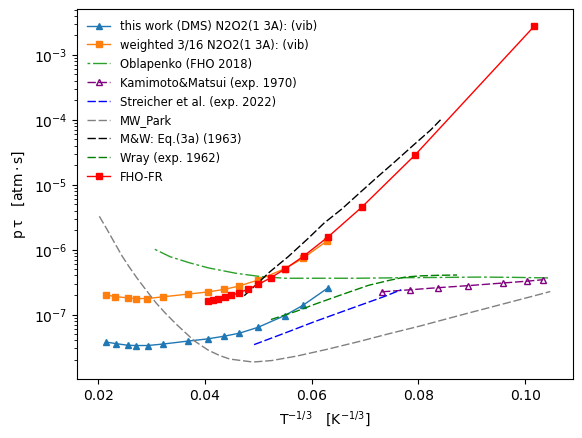

In [72]:
data = get_all_data_points('NO-NO')

fig, ax = plt.subplots()

dms, = ax.plot(data['DMS'][:, 0], data['DMS'][:, 1], '-^', markersize=msize, linewidth=lwidth)
dms.set_label('this work (DMS) N2O2(1 3A): (vib)')

dms_weighted, = ax.plot(data['DMSweighted'][:, 0], data['DMSweighted'][:, 1], '-s', markersize=msize, linewidth=lwidth)
dms_weighted.set_label('weighted 3/16 N2O2(1 3A): (vib)')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth)
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

kamimoto, = ax.plot(data['Kamimoto'][:, 0], data['Kamimoto'][:, 1], '-^', fillstyle='none',markersize=msize, color='purple', linewidth=lwidth)
kamimoto.set_dashes([6, 2])
kamimoto.set_label('Kamimoto&Matsui (exp. 1970)')

streicher, = ax.plot(data['Streicher'][:, 0], data['Streicher'][:, 1], color='blue', linewidth=lwidth)
streicher.set_dashes([6, 2])
streicher.set_label('Streicher et al. (exp. 2022)')

mw_park, = ax.plot(data['MW_Park'][:, 0], data['MW_Park'][:, 1], color='gray', linewidth=lwidth)
mw_park.set_dashes([6, 2])
mw_park.set_label('MW_Park')

mw_eq3, = ax.plot(data['MWeq3'][:, 0], data['MWeq3'][:, 1], color='black', linewidth=lwidth)
mw_eq3.set_dashes([6, 2])
mw_eq3.set_label('M&W: Eq.(3a) (1963)')

wray, = ax.plot(data['Wray'][:, 0], data['Wray'][:, 1], color='green', linewidth=lwidth)
wray.set_dashes([6, 2])
wray.set_label('Wray (exp. 1962)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
# ax.set_xlim(0.02, 0.09)
# ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'NO-NO' + '.png', dpi=600)

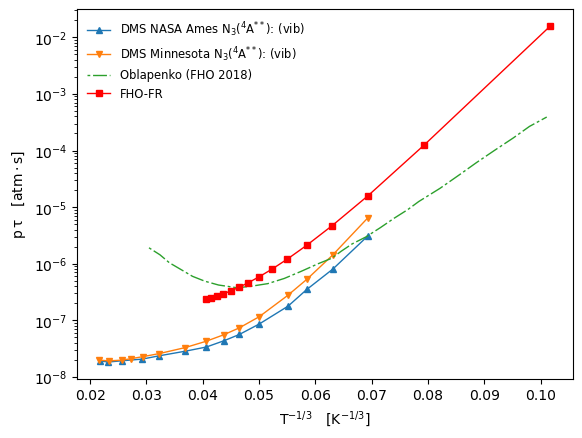

In [20]:
data = get_all_data_points('N2-N')

fig, ax = plt.subplots()

dmsnasa, = ax.plot(data['DMSNASA'][:, 0], data['DMSNASA'][:, 1], '-^', markersize=msize, linewidth=lwidth)
dmsnasa.set_label('DMS NASA Ames $\mathrm{N_{3}(^{4}A^{**})}$: (vib)')

dmsminnesota, = ax.plot(data['DMSminnesota'][:, 0], data['DMSminnesota'][:, 1], '-v', markersize=msize, linewidth=lwidth)
dmsminnesota.set_label(r'DMS Minnesota $\mathrm{N_{3}(^{4} A^{**})}$: (vib)')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth)
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
# ax.set_xlim(0.02, 0.09)
# ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'N2-N' + '.png', dpi=600)

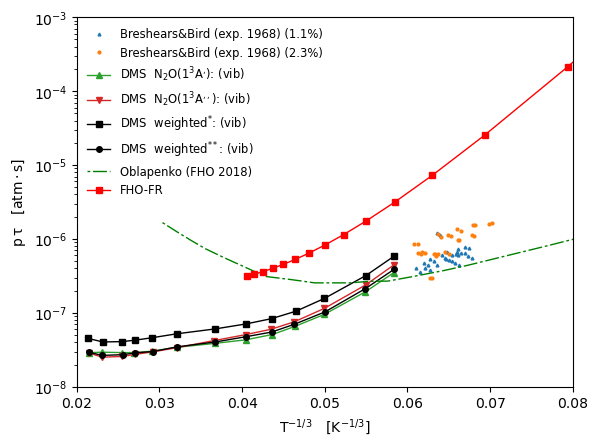

In [38]:
data = get_all_data_points('N2-O')

fig, ax = plt.subplots()

bb11, = ax.plot(data['BB11'][:, 0], data['BB11'][:, 1], '^', markersize=2)
bb11.set_label('Breshears&Bird (exp. 1968) (1.1%)')

bb23, = ax.plot(data['BB23'][:, 0], data['BB23'][:, 1], 'o', markersize=2)
bb23.set_label('Breshears&Bird (exp. 1968) (2.3%)')

dmsa1, = ax.plot(data['DMSa1'][:, 0], data['DMSa1'][:, 1], '-^', markersize=msize, linewidth=lwidth)
dmsa1.set_label(r'DMS  $\mathrm{N_{2}O(1^{3}A^{,})}$: (vib)')

dmsa2, = ax.plot(data['DMSa2'][:, 0], data['DMSa2'][:, 1], '-v', markersize=msize, linewidth=lwidth)
dmsa2.set_label(r'DMS  $\mathrm{N_{2}O(1^{3}A^{,,})}$: (vib)')

dmsweighted1, = ax.plot(data['DMSweighted1'][:, 0], data['DMSweighted1'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='black')
dmsweighted1.set_label(r'DMS  $\mathrm{weighted ^{*}}$: (vib)')

dmsweighted2, = ax.plot(data['DMSweighted2'][:, 0], data['DMSweighted2'][:, 1], '-o', markersize=msize, linewidth=lwidth, color='black')
dmsweighted2.set_label(r'DMS  $\mathrm{weighted ^{**}}$: (vib)')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth, color='green')
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
ax.set_xlim(0.02, 0.08)
ax.set_ylim(0.1e-7, 1e-3)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'N2-O' + '.png', dpi=600)


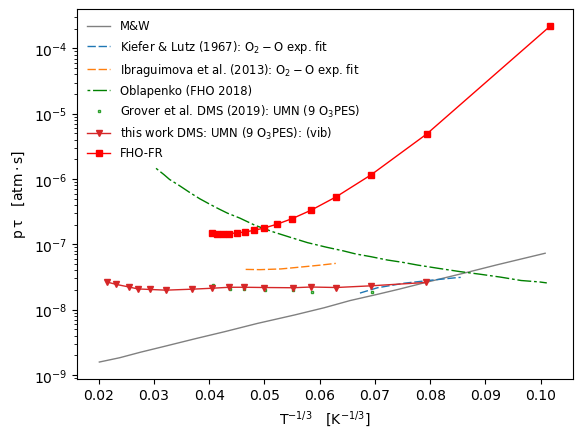

In [30]:
data = get_all_data_points('O2-O')

fig, ax = plt.subplots()

mw, = ax.plot(data['MW'][:, 0], data['MW'][:, 1], linewidth=lwidth, color='gray')
mw.set_label(r'M&W')

kiefer, = ax.plot(data['Kiefer'][:, 0], data['Kiefer'][:, 1], linewidth=lwidth)
kiefer.set_dashes([6, 2])
kiefer.set_label(r'Kiefer & Lutz (1967): $\mathrm{O_{2}-O}$ exp. fit')

ibraguimova, = ax.plot(data['Ibraguimova'][:, 0], data['Ibraguimova'][:, 1], linewidth=lwidth)
ibraguimova.set_dashes([6, 2])
ibraguimova.set_label(r'Ibraguimova et al. (2013): $\mathrm{O_{2}-O}$ exp. fit')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth, color='green')
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

grover, = ax.plot(data['Grover'][:, 0], data['Grover'][:, 1], 's', fillstyle='none', markersize=2)
grover.set_label(r'Grover et al. DMS (2019): UMN (9 $\mathrm{O_{3}}$PES)')

dms, = ax.plot(data['DMS'][:, 0], data['DMS'][:, 1], '-v', markersize=msize, linewidth=lwidth)
dms.set_label(r'this work DMS: UMN (9 $\mathrm{O_{3}}$PES): (vib)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
# ax.set_xlim(0.02, 0.09)
# ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'O2-O' + '.png', dpi=600)

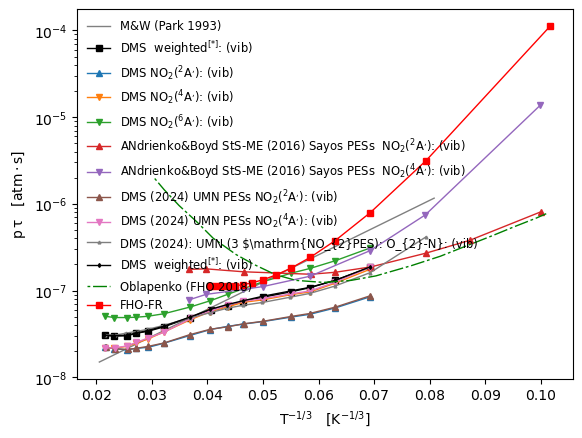

In [34]:
data = get_all_data_points('O2-N')

fig, ax = plt.subplots()

mw, = ax.plot(data['MW'][:, 0], data['MW'][:, 1], linewidth=lwidth, color='gray')
mw.set_label(r'M&W (Park 1993)')

dmsweighted1, = ax.plot(data['DMSweighted1'][:, 0], data['DMSweighted1'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='black')
dmsweighted1.set_label(r'DMS  $\mathrm{weighted ^{[*]}}$: (vib)')


dms2a, = ax.plot(data['DMS2A'][:, 0], data['DMS2A'][:, 1], '-^', markersize=msize, linewidth=lwidth)
dms2a.set_label(r'DMS $\mathrm{NO_{2}(^{2}A^{,})}$: (vib)')

dms4a, = ax.plot(data['DMS4A'][:, 0], data['DMS4A'][:, 1], '-v', markersize=msize, linewidth=lwidth)
dms4a.set_label(r'DMS $\mathrm{NO_{2}(^{4}A^{,})}$: (vib)')

dms6a, = ax.plot(data['DMS6A'][:, 0], data['DMS6A'][:, 1], '-v', markersize=msize, linewidth=lwidth)
dms6a.set_label(r'DMS $\mathrm{NO_{2}(^{6}A^{,})}$: (vib)')


stsme2a, = ax.plot(data['STSME2A'][:, 0], data['STSME2A'][:, 1], '-^', markersize=msize, linewidth=lwidth)
stsme2a.set_label(r'ANdrienko&Boyd StS-ME (2016) Sayos PESs  $\mathrm{NO_{2}(^{2}A^{,})}$: (vib)')

stsme4a, = ax.plot(data['STSME4A'][:, 0], data['STSME4A'][:, 1], '-v', markersize=msize, linewidth=lwidth)
stsme4a.set_label(r'ANdrienko&Boyd StS-ME (2016) Sayos PESs  $\mathrm{NO_{2}(^{4}A^{,})}$: (vib)')


dms_umn2a, = ax.plot(data['DMSUMNPES2A'][:, 0], data['DMSUMNPES2A'][:, 1], '-^', markersize=msize, linewidth=lwidth)
dms_umn2a.set_label(r'DMS (2024) UMN PESs $\mathrm{NO_{2}(^{2}A^{,})}$: (vib)')

dms_umn4a, = ax.plot(data['DMSUMNPES4A'][:, 0], data['DMSUMNPES4A'][:, 1], '-v', markersize=msize, linewidth=lwidth)
dms_umn4a.set_label(r'DMS (2024) UMN PESs $\mathrm{NO_{2}(^{4}A^{,})}$: (vib)')


dms_umn, = ax.plot(data['DMSUMN'][:, 0], data['DMSUMN'][:, 1], '-^', markersize=2, linewidth=lwidth)
dms_umn.set_label(r'DMS (2024): UMN (3 $\mathrm{NO_{2}PES): O_{2}-N}: (vib)')

dms_umn_weighted1, = ax.plot(data['DMSUMNweighted'][:, 0], data['DMSUMNweighted'][:, 1], '-d', markersize=2, linewidth=lwidth, color='black')
dms_umn_weighted1.set_label(r'DMS  $\mathrm{weighted ^{[*]}}$: (vib)')



fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth, color='green')
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
# ax.set_xlim(0.02, 0.09)
# ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'O2-N' + '.png', dpi=600)

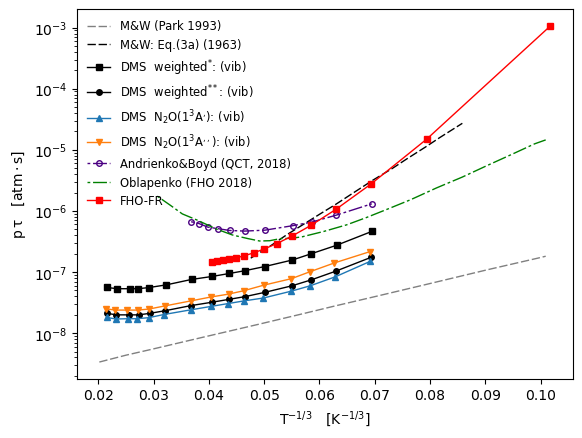

In [28]:
data = get_all_data_points('NO-N')

fig, ax = plt.subplots()

mw_park, = ax.plot(data['MW_Park'][:, 0], data['MW_Park'][:, 1], linewidth=lwidth, color='gray')
mw_park.set_dashes([6, 2])
mw_park.set_label(r'M&W (Park 1993)')

mw_eq3, = ax.plot(data['MWeq3'][:, 0], data['MWeq3'][:, 1], linewidth=lwidth, color='black')
mw_eq3.set_dashes([6, 2])
mw_eq3.set_label(r'M&W: Eq.(3a) (1963)')

dmsweighted1, = ax.plot(data['DMSweighted1'][:, 0], data['DMSweighted1'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='black')
dmsweighted1.set_label(r'DMS  $\mathrm{weighted ^{*}}$: (vib)')

dmsweighted2, = ax.plot(data['DMSweighted2'][:, 0], data['DMSweighted2'][:, 1], '-o', markersize=msize, linewidth=lwidth, color='black')
dmsweighted2.set_label(r'DMS  $\mathrm{weighted ^{**}}$: (vib)')

dmsa1, = ax.plot(data['DMSa1'][:, 0], data['DMSa1'][:, 1], '-^', markersize=msize, linewidth=lwidth)
dmsa1.set_label(r'DMS  $\mathrm{N_{2}O(1^{3}A^{,})}$: (vib)')

dmsa2, = ax.plot(data['DMSa2'][:, 0], data['DMSa2'][:, 1], '-v', markersize=msize, linewidth=lwidth)
dmsa2.set_label(r'DMS  $\mathrm{N_{2}O(1^{3}A^{,,})}$: (vib)')

andrienko, = ax.plot(data['Andrienko'][:, 0], data['Andrienko'][:, 1],'-o', fillstyle='none', markersize=msize, linewidth=lwidth, color='indigo')
andrienko.set_dashes([2, 2, 10, 2])
andrienko.set_label(r'Andrienko&Boyd (QCT, 2018)')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth, color='green')
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
# ax.set_xlim(0.02, 0.09)
# ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'NO-N' + '.png', dpi=600)

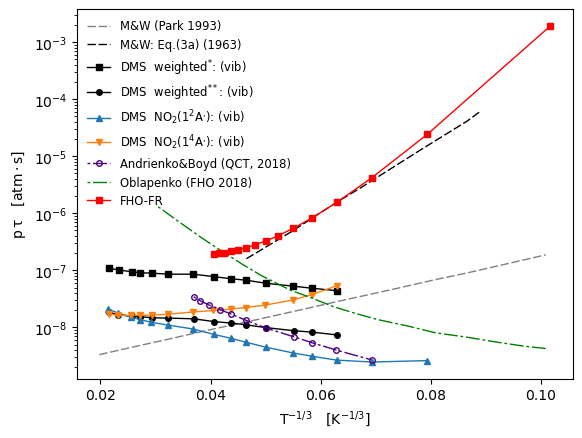

In [29]:
data = get_all_data_points('NO-O')

fig, ax = plt.subplots()

mw_park, = ax.plot(data['MW_Park'][:, 0], data['MW_Park'][:, 1], linewidth=lwidth, color='gray')
mw_park.set_dashes([6, 2])
mw_park.set_label(r'M&W (Park 1993)')

mw_eq3, = ax.plot(data['MWeq3'][:, 0], data['MWeq3'][:, 1], linewidth=lwidth, color='black')
mw_eq3.set_dashes([6, 2])
mw_eq3.set_label(r'M&W: Eq.(3a) (1963)')

dmsweighted1, = ax.plot(data['DMSweighted1'][:, 0], data['DMSweighted1'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='black')
dmsweighted1.set_label(r'DMS  $\mathrm{weighted ^{*}}$: (vib)')

dmsweighted2, = ax.plot(data['DMSweighted2'][:, 0], data['DMSweighted2'][:, 1], '-o', markersize=msize, linewidth=lwidth, color='black')
dmsweighted2.set_label(r'DMS  $\mathrm{weighted ^{**}}$: (vib)')

dms2a, = ax.plot(data['DMS2a'][:, 0], data['DMS2a'][:, 1], '-^', markersize=msize, linewidth=lwidth)
dms2a.set_label(r'DMS  $\mathrm{NO_{2}(1^{2}A^{,})}$: (vib)')

dms4a, = ax.plot(data['DMS4a'][:, 0], data['DMS4a'][:, 1], '-v', markersize=msize, linewidth=lwidth)
dms4a.set_label(r'DMS  $\mathrm{NO_{2}(1^{4}A^{,})}$: (vib)')

andrienko, = ax.plot(data['Andrienko'][:, 0], data['Andrienko'][:, 1],'-o', fillstyle='none', markersize=msize, linewidth=lwidth, color='indigo')
andrienko.set_dashes([2, 2, 10, 2])
andrienko.set_label(r'Andrienko&Boyd (QCT, 2018)')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth, color='green')
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
# ax.set_xlim(0.02, 0.09)
# ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig('plots//' + 'NO-O' + '.png', dpi=600)